# Hands on New York City Taxi Trip data

## Dataset
We will be using the data from the New York City Taxi Trip Duration DataSet that can be obtained from Kaggle at: https://www.kaggle.com/c/nyc-taxi-trip-duration/data

### Data fields
* id - a unique identifier for each trip
* vendor_id - a code indicating the provider associated with the trip record
* pickup_datetime - date and time when the meter was engaged
* dropoff_datetime - date and time when the meter was disengaged
* passenger_count - the number of passengers in the vehicle (driver entered value)
* pickup_longitude - the longitude where the meter was engaged
* pickup_latitude - the latitude where the meter was engaged
* dropoff_longitude - the longitude where the meter was disengaged
* dropoff_latitude - the latitude where the meter was disengaged
* store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* trip_duration - duration of the trip in seconds

## Example analysis question
The city is planning to build taxi stops, locations throughout the city where people can get picked up/dropped off by cabs and wait for cabs to pick them up. This initiative is aiming to:
1. Making it easier and safer for the citizens of the city to get a cab especially during night time
2. Allowing taxi cab drivers to know where to go when they want to find riders
Allowing potential riders to have a point where they can go to when they are looking for taxis.

Your task is to suggest the best locations for these taxi stops, and also to generate insights about the pattern of rides amount throughout the day across the city.

**Result of the visualization are only basic and may only be part of the bigger perspective/conclusion**

In [0]:
import pandas as pd
import folium
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import HeatMap

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/train.csv')

In [0]:
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)
df.rename({'pickup_longitude': 'plog', 'pickup_latitude': 'plat', 'dropoff_longitude': 'dlog', 'dropoff_latitude': 'dlat',
               'trip_duration': 'duration'},axis = 1, inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null datetime64[ns]
dropoff_datetime      1458644 non-null datetime64[ns]
passenger_count       1458644 non-null int64
plog                  1458644 non-null float64
plat                  1458644 non-null float64
dlog                  1458644 non-null float64
dlat                  1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
duration              1458644 non-null int64
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [7]:
df.head(3)

id  vendor_id  ... store_and_fwd_flag duration
0  id2875421          2  ...                  N      455
1  id2377394          1  ...                  N      663
2  id3858529          2  ...                  N     2124

[3 rows x 11 columns]

In [0]:
df.drop(['id', 'vendor_id', 'store_and_fwd_flag'], axis = 1, inplace = True)

In [9]:
df.head(3)

pickup_datetime    dropoff_datetime  ...       dlat  duration
0 2016-03-14 17:24:55 2016-03-14 17:32:30  ...  40.765602       455
1 2016-06-12 00:43:35 2016-06-12 00:54:38  ...  40.731152       663
2 2016-01-19 11:35:24 2016-01-19 12:10:48  ...  40.710087      2124

[3 rows x 8 columns]

In [0]:
class showmap:
    def __init__(self, data, default_location = None, default_zoom_start = None, datasubset = None):
        self.data = data
        self.default_location = default_location
        self.default_zoom_start = default_zoom_start
        self.datasubset = datasubset
        if not self.default_location:
            self.default_location = [40.730610, -73.935242]
        if not self.default_zoom_start:
            self.default_zoom_start = 12
        if not self.datasubset:
            self.datasubset = 200
        
    def generateBaseMap(self):
        base_map = folium.Map(location = self.default_location, control_scale=True, \
                              zoom_start = self.default_zoom_start, tiles='Stamen Terrain')
        return base_map
    
    def plot(self):
        base_map = self.generateBaseMap()
        subset_data = self.data[:self.datasubset]
        for ii in subset_data.iterrows():
          start = 'start time: ' + str(ii[1]['pickup_datetime'])
          endtime = 'end:'+ str(ii[1]['dropoff_datetime']) + '\n' +\
                    'duration: ' + str(round(ii[1]['duration']/60, 2)) + 'mins' #convert secs to minute

          if ii[1]['pickup_datetime']:
            icon=folium.Icon(color='green')
            base_map.add_child(folium.Marker(
                location = [ii[1]['plat'],ii[1]['plog']], 
                popup=start,
                icon = icon))
          if ii[1]['dropoff_datetime']:
            icon=folium.Icon(color='red')
            base_map.add_child(folium.Marker(
                  location = [ii[1]['dlat'],ii[1]['dlog']], 
                  popup=endtime,
                  icon = icon))
          base_map.add_child(folium.PolyLine(
                  locations = [[ii[1]['plat'], ii[1]['plog']],
                             [ii[1]['dlat'], ii[1]['dlog']]], 
                  ))

        return display(base_map)
        

In [40]:
showmap(df, datasubset=400).plot()

### Density Based Clustering for REcommendation

#### How Density-based Clustering works
The Density-based Clustering tool works by detecting 
areas where points are concentrated and where 
they are separated by areas that are empty or sparse. 
Points that are not part of a cluster are labeled as noise.

This tool uses unsupervised machine learning clustering 
algorithms which automatically detect patterns based purely 
on spatial location and the distance to a specified number of neighbors. 
These algorithms are considered unsupervised because they do not require 
any training on what it means to be a cluster.

In our case however, we can use DBSCAn to locate points of interest in the dataset. Meaning pickup points.

Reference: https://pro.arcgis.com/en/pro-app/tool-reference/spatial-statistics/how-density-based-clustering-works.htm

In [0]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=3, min_samples=2).fit(df[:500].drop(['pickup_datetime', 'dropoff_datetime'], axis = 1))

In [42]:
clustering.labels_
type(clustering.labels_)

numpy.ndarray

In [0]:
pd.set_option('mode.chained_assignment', None)

In [0]:
subset = df[:500].copy(deep = True)
subset['target'] = clustering.labels_

Areas taxi drivers are not expected to go

In [44]:
print(np.sum(clustering.labels_ == -1)); print(np.sum(clustering.labels_ == 1));print(np.sum(clustering.labels_ == 2))

185
2
8


In [45]:
subset.head(3)

pickup_datetime    dropoff_datetime  ...  duration  target
0 2016-03-14 17:24:55 2016-03-14 17:32:30  ...       455      -1
1 2016-06-12 00:43:35 2016-06-12 00:54:38  ...       663       0
2 2016-01-19 11:35:24 2016-01-19 12:10:48  ...      2124       1

[3 rows x 9 columns]

In [0]:
class showmapCluster:
    def __init__(self, data, default_location = None, default_zoom_start = None, datasubset = None, out = None):
        self.data = data
        self.default_location = default_location
        self.default_zoom_start = default_zoom_start
        self.datasubset = datasubset
        self.out = out
        if not self.default_location:
            self.default_location = [40.730610, -73.935242]
        if not self.default_zoom_start:
            self.default_zoom_start = 12
        if not self.datasubset:
            self.datasubset = 200
        if not self.out:
            self.out = -1
        else:
            self.out = out
    def generateBaseMap(self):
        base_map = folium.Map(location = self.default_location, control_scale=True, \
                              zoom_start = self.default_zoom_start, tiles='Stamen Terrain')
        return base_map
    
    def plot(self):
        base_map = self.generateBaseMap()
        subset_data = self.data[:self.datasubset]
        for ii in subset_data.iterrows():
          start = f"start datetime: {str(ii[1]['pickup_datetime'])}"
          endtime = f"end: {str(ii[1]['dropoff_datetime'])} \n\
                            duration: {str(round(ii[1]['duration']/60))}mins" #convert secs to minute
          if (ii[1]['pickup_datetime']):
            if ii[1]['target'] != self.out:
              icon=folium.Icon(color='green')
              base_map.add_child(folium.Marker(
                  location = [ii[1]['plat'],ii[1]['plog']], 
                  popup=start,
                  icon = icon))
            else:
              icon=folium.Icon(color='black')
              base_map.add_child(folium.Marker(
                  location = [ii[1]['plat'],ii[1]['plog']], 
                  popup=start,
                  icon = icon))
          if ii[1]['dropoff_datetime']:
              if ii[1]['target'] != self.out:
                icon=folium.Icon(color='red')
                base_map.add_child(folium.Marker(
                      location = [ii[1]['dlat'],ii[1]['dlog']], 
                      popup=endtime,
                      icon = icon))
              else:
                icon=folium.Icon(color='blue')
                base_map.add_child(folium.Marker(
                      location = [ii[1]['dlat'],ii[1]['dlog']], 
                      popup=endtime,
                      icon = icon))
          base_map.add_child(folium.PolyLine(
                  locations = [[ii[1]['plat'], ii[1]['plog']],
                             [ii[1]['dlat'], ii[1]['dlog']]], 
                  ))

        return display(base_map)

Since the result of **DBSCAN** is density based, its possible it must have clustered both points to stop for pickups and points not to. Until further analysis is done we cannot know for sure which points are the best stops.[link text](https://).

Note that DBSCAN particularly meant for desnity areas considered to be anomaly.

The Blackspot are the supposed sweet pickup spot.

In [86]:
showmapCluster(subset, datasubset = 300).plot()

A plot of only pickup spots and destination using DBSCAN clustering algorithm.

In [87]:
showmapCluster(subset[subset.target == -1], datasubset = 300).plot()

In [90]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2)

Kmean.fit(df[:500].drop(['pickup_datetime', 'dropoff_datetime'], axis = 1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [91]:
Kmean.labels_[:100]

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0], dtype=int32)

In [92]:
np.sum(Kmean.labels_ == 1)

72

In [93]:
subset.head(2)

pickup_datetime    dropoff_datetime  ...  duration  target
0 2016-03-14 17:24:55 2016-03-14 17:32:30  ...       455      -1
1 2016-06-12 00:43:35 2016-06-12 00:54:38  ...       663       0

[2 rows x 9 columns]

In [0]:
subset['target'] = Kmean.labels_

In [96]:
showmapCluster(subset, datasubset=400, out = 1).plot()

A plot of only pickup spots and destination using KMeans clustering algorithm.

In [98]:
showmapCluster(subset[subset.target == 1], datasubset=500, out = 1).plot()

Before removing the areas of no convern, we may need to dig for some insights first. Finding Correlation between features

In [0]:
import seaborn as sns

By finding the correlation between this features, we find out the highly relationship between between target and duration. Their is also some correlation between pickup longitude and destination longitude.

In [100]:
subset.corr()

passenger_count      plog  ...  duration    target
passenger_count         1.000000  0.080111  ... -0.029722 -0.051632
plog                    0.080111  1.000000  ...  0.412014  0.330724
plat                   -0.063986 -0.203563  ... -0.262936 -0.194099
dlog                   -0.049139  0.331572  ...  0.228419  0.242481
dlat                    0.024858  0.054297  ... -0.104072 -0.074815
duration               -0.029722  0.412014  ...  1.000000  0.774248
target                 -0.051632  0.330724  ...  0.774248  1.000000

[7 rows x 7 columns]

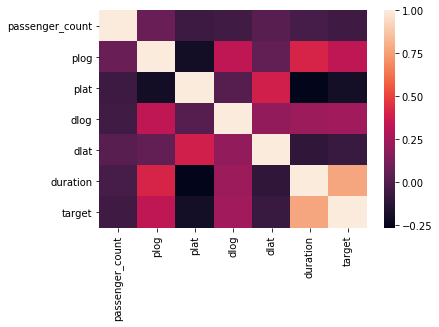

In [101]:
sns.heatmap(subset.corr())

Remove what we consider outliers.

In [0]:
subset = subset[subset.target != 1]

In [103]:
subset.head(5)

pickup_datetime    dropoff_datetime  ...  duration  target
0 2016-03-14 17:24:55 2016-03-14 17:32:30  ...       455       0
1 2016-06-12 00:43:35 2016-06-12 00:54:38  ...       663       0
3 2016-04-06 19:32:31 2016-04-06 19:39:40  ...       429       0
4 2016-03-26 13:30:55 2016-03-26 13:38:10  ...       435       0
5 2016-01-30 22:01:40 2016-01-30 22:09:03  ...       443       0

[5 rows x 9 columns]

In [104]:
len(subset)

428

We can also assume the first KMeans takes points with high reach/duration. Performing another cluster analysis can help infact find best pickup spots in the dataset.

In [105]:
showmap(subset, datasubset=428).plot()